In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('./result200.csv',header=0,index_col = 0)
print(df.shape)
df

(3260, 12)


,name,category,project,guest,bedroom,bathroom,price,discounted,normal price,province,state,country
0,San's Home [Sharing home],Condominium,Nam Trung Yên,2,1,1,13,0,Invalid,Cầu Giấy,Hà Nội,Vietnam
1,Chillin House,Service Apartment,Vũng Tàu Melody,12,3,2,47,1,58,Vũng Tàu,Bà Rịa Vũng Tàu,Vietnam
2,MLibrary Pentstudio Apartment West Lake with P...,None,None,6,1,1,74,0,Invalid,Tây Hồ,Hà Nội,Vietnam
3,Win Aparment Studio Tiêu chuẩn (Min 2 night) #1,Studio Apartment,None,3,1,1,11,0,Invalid,Sơn Trà,Đà Nẵng,Vietnam
4,✦Luxury Villa 6BR✦Thao Dien Dist 2✦Bathtub✦Big...,Villa,None,16,6,8,275,1,305,Quận 2,Hồ Chí Minh,Vietnam
...,...,...,...,...,...,...,...,...,...,...,...,...
3255,Invalid,None,None,0,0,0,0,0,Invalid,Invalid,Invalid,Invalid
3256,Invalid,None,None,0,0,0,0,0,Invalid,Invalid,Invalid,Invalid
3257,Invalid,None,None,0,0,0,0,0,Invalid,Invalid,Invalid,Invalid
3258,Invalid,None,None,0,0,0,0,0,Invalid,Invalid,Invalid,Invalid


Remove Noise

In [2]:
df = df[df['name']!='Invalid'].reset_index(drop=True)
df.shape

(2200, 12)

Remove duplicated values

In [3]:
dup = df.name.duplicated()

In [4]:
not_dup = dup.map(lambda x: not x)
print(not_dup, not_dup.sum())

0       True
1       True
2       True
3       True
4       True
        ... 
2195    True
2196    True
2197    True
2198    True
2199    True
Name: name, Length: 2200, dtype: bool 1831


In [5]:
df = df[not_dup].reset_index(drop=True)
df

,name,category,project,guest,bedroom,bathroom,price,discounted,normal price,province,state,country
0,San's Home [Sharing home],Condominium,Nam Trung Yên,2,1,1,13,0,Invalid,Cầu Giấy,Hà Nội,Vietnam
1,Chillin House,Service Apartment,Vũng Tàu Melody,12,3,2,47,1,58,Vũng Tàu,Bà Rịa Vũng Tàu,Vietnam
2,MLibrary Pentstudio Apartment West Lake with P...,None,None,6,1,1,74,0,Invalid,Tây Hồ,Hà Nội,Vietnam
3,Win Aparment Studio Tiêu chuẩn (Min 2 night) #1,Studio Apartment,None,3,1,1,11,0,Invalid,Sơn Trà,Đà Nẵng,Vietnam
4,✦Luxury Villa 6BR✦Thao Dien Dist 2✦Bathtub✦Big...,Villa,None,16,6,8,275,1,305,Quận 2,Hồ Chí Minh,Vietnam
...,...,...,...,...,...,...,...,...,...,...,...,...
1826,STAY HOUSE TRUNG TÂM CẦN THƠ - PHÒNG TIÊU CH...,Entire House,None,3,1,1,12,0,Invalid,Ninh Kiều,Cần Thơ,Vietnam
1827,Homestay An Lạc_Tầng 3_Phòng tập thể,Entire House,None,10,1,1,27,1,30,Quy Nhơn,Bình Định,Vietnam
1828,Homestay Ken King,Other,None,4,1,2,7,0,Invalid,Tuy Hòa,Phú Yên,Vietnam
1829,Diagon Alley - Hẻm Xéo Homestay - Phòng Dorm ...,Entire House,None,6,1,1,7,0,Invalid,Nha Trang,Khánh Hòa,Vietnam


Apparently luxstay is not just for Vietnam

In [35]:
df.country.unique()

array(['Vietnam', 'Việt Nam', 'United States', 'Thailand', 'Thái Lan'],
      dtype=object)

Inspecting the dataframe..

In [37]:
df[df.country=='Việt Nam']

,name,category,project,guest,bedroom,bathroom,price,discounted,normal price,province,state,country
769,Saigon Minimalist Riverview Apartment - Ha Noi...,Studio Apartment,None,2,1,1,45,0,Invalid,Quận 2,Hồ Chí Minh,Việt Nam
909,LUXSTUDIO❤️ MODERN ROOM IN MILLENNIUM❤️FREE GY...,Studio Apartment,Millennium Masteri,3,1,1,46,0,Invalid,Quận 4,Hồ Chí Minh,Việt Nam
1238,Quang'S House Goldmark City Hanoi,Condominium,None,7,3,2,65,0,Invalid,Nam Từ Liêm,Hà Nội,Việt Nam
1244,KZR Kuala Lumpur Homestay,Condominium,None,10,2,2,52,0,Invalid,Ma-lai-xi-a,Kuala Lumpur,Việt Nam


Replace similar meaning country names

In [39]:
df.country = df.country.replace({'Việt Nam':'Vietnam','Thái Lan':'Thailand'})

In [40]:
df.country.unique()

array(['Vietnam', 'United States', 'Thailand'], dtype=object)

In [55]:
df.loc[df.country.map(lambda x: True if x in ['United States', 'Thailand'] else False)]

,name,category,project,guest,bedroom,bathroom,price,discounted,normal price,province,state,country
1249,Airstream Houseboat with Amazing Lake Travis View,Entire House,None,10,2,2,122,0,Invalid,Travis County,Texas,United States
1358,"Căn hộ 1PN trung tâm Pratunam, Bangkok",Condominium,None,3,1,1,54,0,Invalid,Ratchathewi,Krung Thep Maha Nakhon,Thailand
1687,〖Nato〗1 Mins to MRT Ratchada station/2 pools/B...,Condominium,None,3,1,1,57,0,Invalid,Khet Din Daeng,Bangkok,Thailand
1745,DIY Guesthouse 2 Flr,Entire House,None,3,1,1,39,0,Invalid,Phaya Thai,Bangkok,Thailand


Remove non-Vietnam homestay records

In [58]:
df = df.loc[df.country.map(lambda x: False if (x in ['United States', 'Thailand']) else True)].reset_index(drop=True)
df

,name,category,project,guest,bedroom,bathroom,price,discounted,normal price,province,state,country
0,San's Home [Sharing home],Condominium,Nam Trung Yên,2,1,1,13,0,Invalid,Cầu Giấy,Hà Nội,Vietnam
1,Chillin House,Service Apartment,Vũng Tàu Melody,12,3,2,47,1,58,Vũng Tàu,Bà Rịa Vũng Tàu,Vietnam
2,MLibrary Pentstudio Apartment West Lake with P...,None,None,6,1,1,74,0,Invalid,Tây Hồ,Hà Nội,Vietnam
3,Win Aparment Studio Tiêu chuẩn (Min 2 night) #1,Studio Apartment,None,3,1,1,11,0,Invalid,Sơn Trà,Đà Nẵng,Vietnam
4,✦Luxury Villa 6BR✦Thao Dien Dist 2✦Bathtub✦Big...,Villa,None,16,6,8,275,1,305,Quận 2,Hồ Chí Minh,Vietnam
...,...,...,...,...,...,...,...,...,...,...,...,...
1822,STAY HOUSE TRUNG TÂM CẦN THƠ - PHÒNG TIÊU CH...,Entire House,None,3,1,1,12,0,Invalid,Ninh Kiều,Cần Thơ,Vietnam
1823,Homestay An Lạc_Tầng 3_Phòng tập thể,Entire House,None,10,1,1,27,1,30,Quy Nhơn,Bình Định,Vietnam
1824,Homestay Ken King,Other,None,4,1,2,7,0,Invalid,Tuy Hòa,Phú Yên,Vietnam
1825,Diagon Alley - Hẻm Xéo Homestay - Phòng Dorm ...,Entire House,None,6,1,1,7,0,Invalid,Nha Trang,Khánh Hòa,Vietnam


In [60]:
df = df.loc[df.state.map(lambda x: False if x == 'Kuala Lumpur' else True)].reset_index(drop=True)
df

,name,category,project,guest,bedroom,bathroom,price,discounted,normal price,province,state,country
0,San's Home [Sharing home],Condominium,Nam Trung Yên,2,1,1,13,0,Invalid,Cầu Giấy,Hà Nội,Vietnam
1,Chillin House,Service Apartment,Vũng Tàu Melody,12,3,2,47,1,58,Vũng Tàu,Bà Rịa Vũng Tàu,Vietnam
2,MLibrary Pentstudio Apartment West Lake with P...,None,None,6,1,1,74,0,Invalid,Tây Hồ,Hà Nội,Vietnam
3,Win Aparment Studio Tiêu chuẩn (Min 2 night) #1,Studio Apartment,None,3,1,1,11,0,Invalid,Sơn Trà,Đà Nẵng,Vietnam
4,✦Luxury Villa 6BR✦Thao Dien Dist 2✦Bathtub✦Big...,Villa,None,16,6,8,275,1,305,Quận 2,Hồ Chí Minh,Vietnam
...,...,...,...,...,...,...,...,...,...,...,...,...
1821,STAY HOUSE TRUNG TÂM CẦN THƠ - PHÒNG TIÊU CH...,Entire House,None,3,1,1,12,0,Invalid,Ninh Kiều,Cần Thơ,Vietnam
1822,Homestay An Lạc_Tầng 3_Phòng tập thể,Entire House,None,10,1,1,27,1,30,Quy Nhơn,Bình Định,Vietnam
1823,Homestay Ken King,Other,None,4,1,2,7,0,Invalid,Tuy Hòa,Phú Yên,Vietnam
1824,Diagon Alley - Hẻm Xéo Homestay - Phòng Dorm ...,Entire House,None,6,1,1,7,0,Invalid,Nha Trang,Khánh Hòa,Vietnam


There are two Hanoi here, which is actually differently encoded:

In [61]:
print(np.sort(df.province.unique()))
print(np.sort(df.state.unique()))

['Ba Vì' 'Ba Đình' 'Buôn Ma Thuột' 'Bá Thước' 'Bình Thạnh' 'Bình Thủy'
 'Bảo Lộc' 'Bảo Yên' 'Bắc Từ Liêm' 'Bến Tre' 'Bố Trạch' 'Cai Lậy'
 'Cam Lâm' 'Cao Bằng' 'Cái Răng' 'Cô Tô' 'Côn Đảo' 'Cần Đước' 'Cầu Giấy'
 'Cẩm Xuyên' 'Củ Chi' 'Gia Lâm' 'Gia Viễn' 'Hai Bà Trưng' 'Hoa Lư'
 'Hoàn Kiếm' 'Hoàng Mai' 'Huế' 'Hà Giang' 'Hà Đông' 'Hàm Thuận Nam'
 'Hòa Bình' 'Hương Thủy' 'Hương Trà' 'Hạ Long' 'Hải An' 'Hải Châu'
 'Hội An' 'Liên Chiểu' 'Long Biên' 'Long Khánh' 'Long Điền' 'Lào Cai'
 'Lý Sơn' 'Lương Sơn' 'Nam Từ Liêm' 'Nam Định' 'Ngô Quyền' 'Ngũ Hành Sơn'
 'Nha Trang' 'Nhà Bè' 'Ninh Bình' 'Ninh Kiều' 'Phan Thiết' 'Phú Nhuận'
 'Phú Quốc' 'Phú Vang' 'Phúc Yên' 'Quy Nhơn' 'Quận 1' 'Quận 12' 'Quận 2'
 'Quận 3' 'Quận 4' 'Quận 5' 'Quận 7' 'Quận 9' 'Sa Pa' 'Sóc Sơn' 'Sơn Trà'
 'Sầm Sơn' 'Tam Đảo' 'Thanh Khê' 'Thanh Xuân' 'Thành phố Hội An'
 'Thăng Bình' 'Thủ Dầu Một' 'Tuy Hòa' 'Tân Bình' 'Tây Hồ' 'Tây Ninh'
 'Văn Giang' 'Vũng Tàu' 'Điện Bàn' 'Đà Lạt' 'Đông Anh' 'Đất Đỏ' 'Đống Đa'
 'Đồ Sơn' 'Đồng Hớ

In [65]:
df.state = df.state.replace({'Hà Nội':'Hà Nội'})
print(np.sort(df.state.unique()))
print(np.sort(df.country.unique()))

['Bà Rịa Vũng Tàu' 'Bình Dương' 'Bình Thuận  ' 'Bình Định' 'Bến Tre'
 'Cao Bằng' 'Cần Thơ' 'Hà Giang' 'Hà Nội' 'Hà Tĩnh' 'Hòa Bình' 'Hưng Yên'
 'Hải Phòng' 'Hồ Chí Minh' 'Khánh Hòa' 'Kiên Giang' 'Long An' 'Lào Cai'
 'Lâm Đồng' 'Nam Định' 'Ninh Bình' 'Phú Yên' 'Quảng Bình' 'Quảng Nam'
 'Quảng Ngãi' 'Quảng Ninh' 'Thanh Hóa' 'Thừa Thiên Huế' 'Tiền Giang'
 'Tây Ninh' 'Vĩnh Phúc' 'Đà Nẵng' 'Đắk Lắk' 'Đồng Nai']
['Vietnam']


Make state and province categorial

In [70]:
df.state = df.state.astype("category")
df.province = df.province.astype("category")

In [71]:
df.state.describe()

count       1826
unique        34
top       Hà Nội
freq         473
Name: state, dtype: object

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

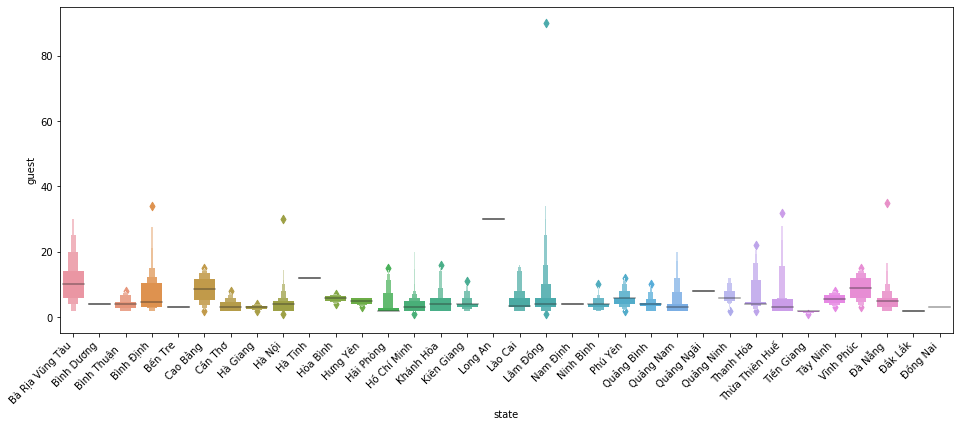

In [98]:
plt.figure(figsize=(16,6))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'
)
sns.boxenplot(x="state", y="guest", data=df)

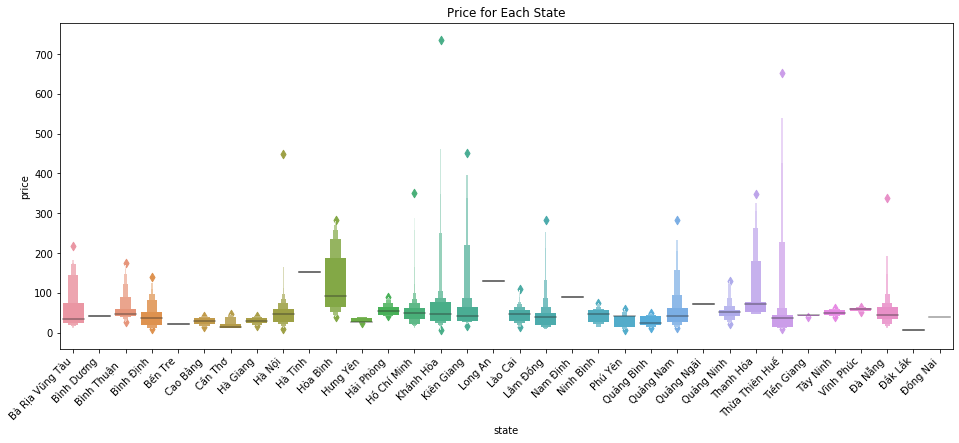

In [100]:
plt.figure(figsize=(16,6))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'
)
plt.title("Price for Each State")
sns.boxenplot(x="state", y="price", data=df)

Show the graph of count for each state

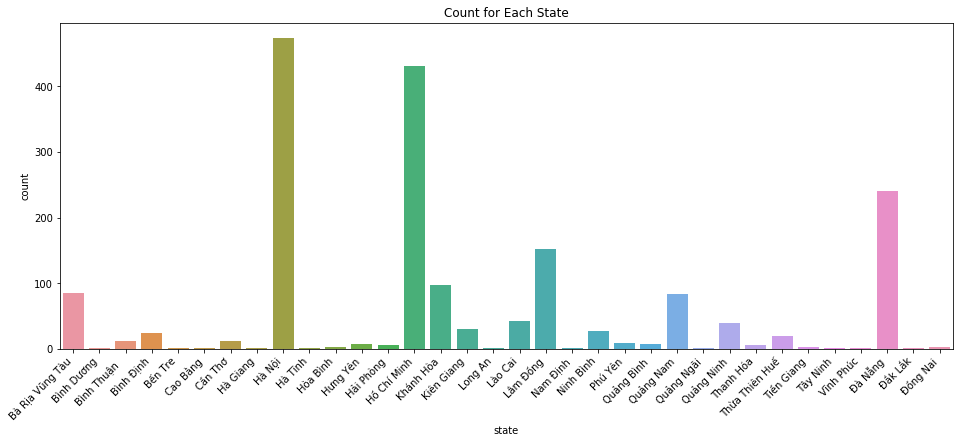

In [114]:
plt.figure(figsize=(16,6))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'
)
plt.title("Count for Each State")
chart = sns.countplot(
    data=df,
    x='state'
)

However this is not intuitive enough.<br/>
* pandas have a function of counting the values in a pandas dataframe/series which returns a sorted series.
* order on seaborn graph is used to show the categories in the same order as the sorted series.

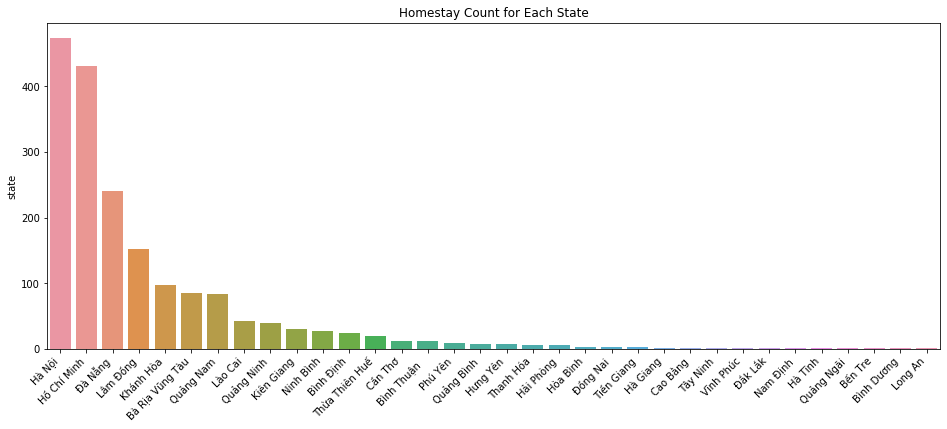

In [117]:
plt.figure(figsize=(16,6))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'
)
plt.title("Homestay Count for Each State")
count = df.state.value_counts()
sns.barplot(x=count.index,
            y=count,
            order=count.index)

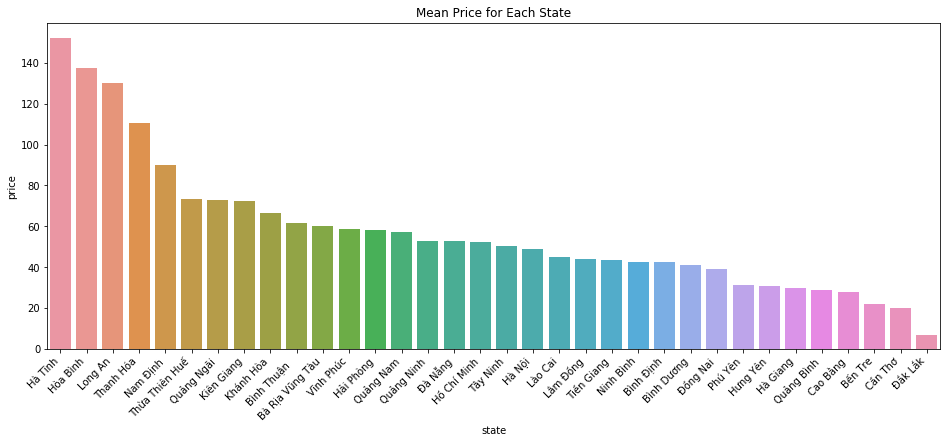

In [128]:
m=(df.groupby('state').price.mean().sort_values(ascending=False))
plt.figure(figsize=(16,6))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'
)
plt.title("Mean Price for Each State")
sns.barplot(x=m.index,
            y=m,
            order=m.index)

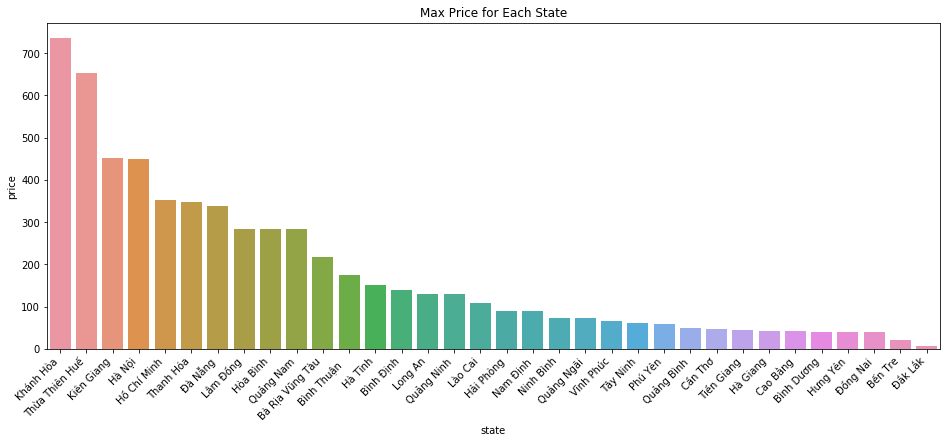

In [130]:
m=(df.groupby('state').price.max().sort_values(ascending=False))
plt.figure(figsize=(16,6))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'
)
plt.title("Max Price for Each State")
sns.barplot(x=m.index,
            y=m,
            order=m.index)